## FINAL PROJECT DATA ANALYSIS WITH PYTHON

In [ ]:
!pip3 install scikit-learn --upgrade --user

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [ ]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# QUESTION 1
display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [ ]:
# display the data types of each column
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# QUESTION 2
drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.



In [ ]:
# drop the columns "id" and "Unnamed: 0" from axis 1
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# method describe() to obtain a statistical summary of the data
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

# QUESTION 3
use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [ ]:
# use the method value_counts to count the number of houses with unique floor values, use the method .to_frame()
floor_counts = df["floors"].value_counts().to_frame()

# display result
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


# QUESTION 4
use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

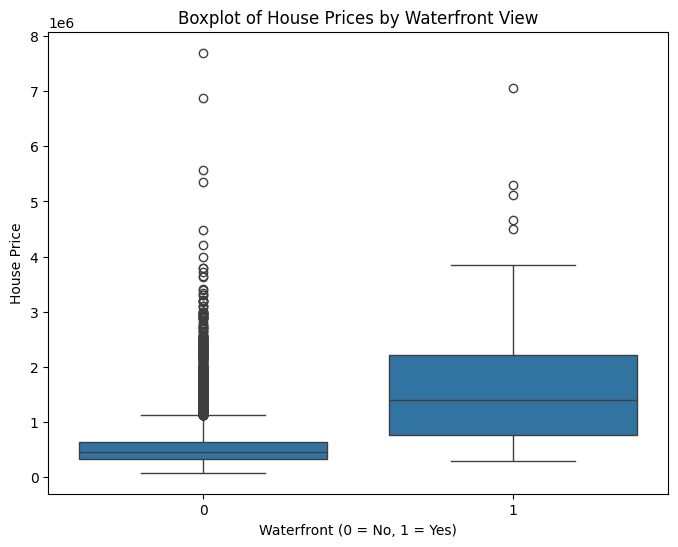

In [ ]:
# use the function boxplot in the seaborn library to determine whether houses with a waterfront view
plt.figure(figsize=(8, 6))
sns.boxplot(x="waterfront", y="price", data=df)

# display plot
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("House Price")
plt.title("Boxplot of House Prices by Waterfront View")
plt.show()

# QUESTION 5
use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

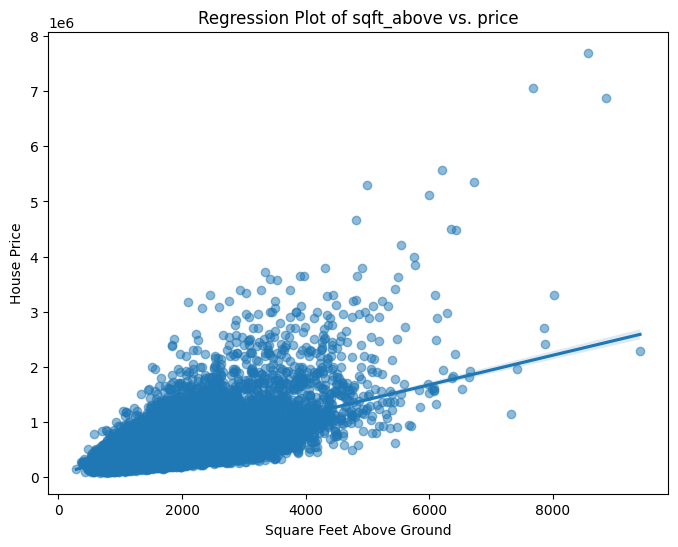

In [ ]:
# use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price
plt.figure(figsize=(8, 6))
sns.regplot(x="sqft_above", y="price", data=df, scatter_kws={'alpha':0.5})

# display plot
plt.xlabel("Square Feet Above Ground")
plt.ylabel("House Price")
plt.title("Regression Plot of sqft_above vs. price")
plt.show()

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

# QUESTION 6
fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [ ]:
# separate independent (X) and dependent (y) variables
X = df[['sqft_living']]
y = df['price']

# create a linear regression model
lm = LinearRegression()
lm.fit(X, y)

# predicting house prices
y_pred = lm.predict(X)

# calculating R^2
r2 = r2_score(y, y_pred)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.4929


# QUESTION 7
fit a linear regression model to predict the 'price' using the list of features:

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

then calculate the R^2. take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [ ]:
# drop rows with any missing values in the specified features
X = df[features].dropna()

# update the target variable accordingly
y = df.loc[X.index, 'price']

# proceed with model training
lm = LinearRegression()
lm.fit(X, y)

# predicting house prices
y_pred = lm.predict(X)

# calculating R^2
r2 = r2_score(y, y_pred)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.6578


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# QUESTION 8
use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.



In [ ]:
# drop rows with any missing values in the specified features
X = df[features].dropna()

# update the target variable accordingly
y = df.loc[X.index, 'price']

# creating a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())  #
])

# train the pipeline with data
pipeline.fit(X, y)

# predicting house prices
y_pred = pipeline.predict(X)

# calculating R^2
r2 = r2_score(y, y_pred)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.6578


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3240
number of training samples: 18357


# QUESTION 9
create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [ ]:
# creating a ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# training the model with training data
ridge_model.fit(x_train, y_train)

# predicting house prices on test data
y_pred = ridge_model.predict(x_test)

# calculating R² on test data
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Ridge Regression): {r2:.4f}")

R² Score (Ridge Regression): 0.6743


# QUESTION 10
perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [ ]:
# performing 2nd order polynomial transformations
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# creating a Ridge Regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# training the model with transformed training data
ridge_model.fit(x_train_poly, y_train)

# predicting house prices on test data
y_pred = ridge_model.predict(x_test_poly)

# calculate R² on test data
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Polynomial Ridge Regression - Degree 2): {r2:.4f}")

R² Score (Polynomial Ridge Regression - Degree 2): 0.6882
